In [1]:
from data_loader.utils import load_image_by_cv2
import os
import matplotlib.pyplot as plt
from image_segmentation.hough_lines import HoughLines
from settings import DATA_PATH
import glob
import numpy as np
import seaborn as sns

In [2]:
file_name = 'law.jpg'
file_path = os.path.join("base_dataset", "cartoon", file_name)
image = load_image_by_cv2(file_path)

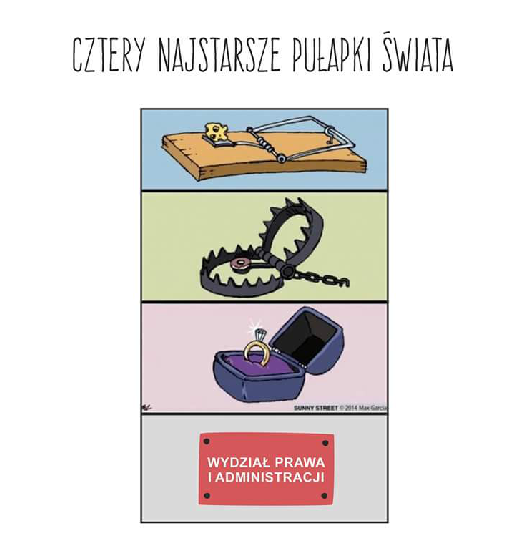

In [3]:
plt.figure(figsize = (10, 10))
plt.axis("off")
plt.imshow(image)
plt.show()

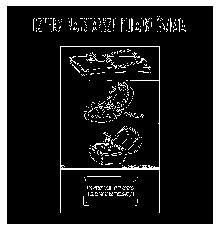

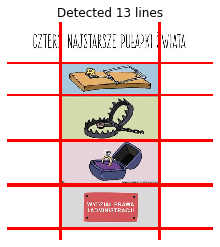

306

In [4]:
hl = HoughLines()
img, edges_norm, auto_line_len = hl.get_image_with_lines(image, 300, plot=True)
auto_line_len

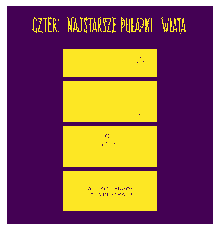

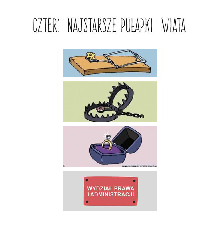

1

In [5]:
bounding_boxes = hl.get_bounding_boxes(img, plot=True)
len(bounding_boxes)

# Experiments 

In [10]:
def hough_tests_50(plot=True):
    images_path = os.path.join(DATA_PATH, "base_dataset", "segmentation", "tests")
    file_names_full = glob.glob(images_path + '/*')
    file_names = [fn.split('/')[-1] for fn in file_names_full]
    labels = [int(fn.split('.')[-2][-1]) for fn in file_names]

    if plot:
        labels_no, labels_count = np.unique(labels, return_counts=True)
        labels_no = ['1', '2', '3', '4', '5 and more']
        labels_count = list(labels_count[:4]) + [sum(labels_count[4:])]
        plt.bar(labels_no, labels_count)
        plt.xlabel('number of pictures on single meme')
        plt.ylabel('number of memes')
        plt.show()

    wrong_label = 0
    wrong_classifies = np.zeros(shape=(10,))

    for label, file_name in zip(labels, file_names_full):
        image = load_image_by_cv2(file_name)

        hl = HoughLines()
        edges = hl.get_edges(image.copy())
        im, norm_edges, auto_min_line_len = hl.get_image_with_lines(image, edges)
        boxes = hl.get_bounding_boxes(im, plot=False)
        if len(boxes) != label:
            wrong_classifies[label] += 1
            if plot:
                print('\n---------------------------------------')
                hl.get_bounding_boxes(im, plot=True, plot_title=f'{len(boxes)} instead {label} bounding boxes')
                print(file_name.split('/')[-1])
            wrong_label += 1

    print(f'Wrongly labeled images: {wrong_label}/{len(file_names)}')
    return wrong_classifies

In [5]:
def single_test(img_name, l=None):
    images_path = os.path.join(DATA_PATH, "base_dataset", "segmentation", "tests")
    file_name = glob.glob(f'{images_path}/{img_name}*')[0]
    label = int(file_name.split('_')[-1][0])

    image = load_image_by_cv2(file_name)
    x, y, _ = image.shape
    print(f'\nImage shape: ({x}, {y})')

    hl = HoughLines()

    print(f'\nMinimum no of points: {"automatic" if l is None else l}')
    edges = hl.get_edges(image.copy())
    im, norm_edges, auto_min_line_len = hl.get_image_with_lines(image, edges, l, plot=True)
    print(f'Normalized edges: {norm_edges}')
    print(f'Automatic value of min_lines: {auto_min_line_len}')
    
    boxes = hl.get_bounding_boxes(im, plot=True)
    print(f'Bounding boxes: {len(boxes)}\n{boxes}')

## Visualization of the data

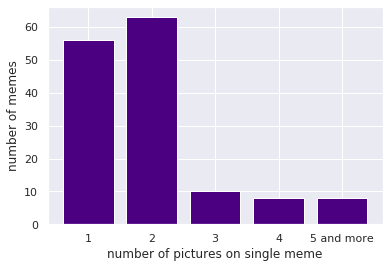

In [26]:
sns.set()

images_path = os.path.join(DATA_PATH, "base_dataset", "segmentation", "tests")
file_names_full = glob.glob(images_path + '/*')
file_names = [fn.split('/')[-1] for fn in file_names_full]
labels = [int(fn.split('.')[-2][-1]) for fn in file_names]

labels_no, labels_count = np.unique(labels, return_counts=True)
labels_no = ['1', '2', '3', '4', '5 and more']
labels_count = list(labels_count[:4]) + [sum(labels_count[4:])]
plt.bar(labels_no, labels_count, color='indigo')
plt.xlabel('number of pictures on single meme')
plt.ylabel('number of memes')
plt.show()

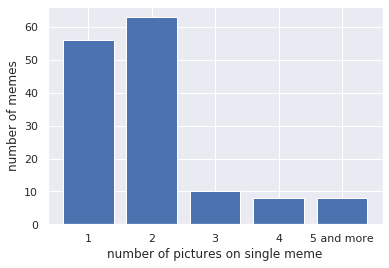


---------------------------------------
85804864_2.jpg

---------------------------------------
eggyboi-5c75f210c9e77c00012f810c_HARD_2.jpeg

---------------------------------------
2019-11-14-2_2.jpg

---------------------------------------
92ggiqpf5xs01_4.jpg

---------------------------------------
end-of-relationships-men-women-day-1-day-7-day-11696537_6.png

---------------------------------------
imageqqs_2.jpeg

---------------------------------------
44164378._SY475_2.jpg

---------------------------------------
ba96c7c1e6a1389a3743d362da13f70c_2.jpg

---------------------------------------
memes_HARD_3.jpg

---------------------------------------
funny-stranger-things-memes-fb12-png__700_3.jpg

---------------------------------------
90-Deal-With-It-Memes-That-Are-So-True_2.jpeg

---------------------------------------
Vo5Mx2C_2.jpg

---------------------------------------
388_HARD_5.png

---------------------------------------
vab7m_3.jpg

-----------------------------------

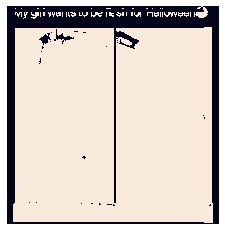

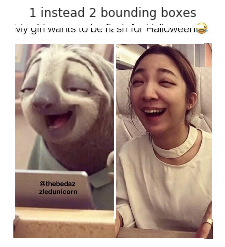

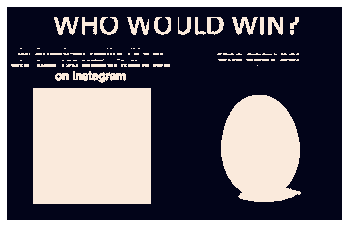

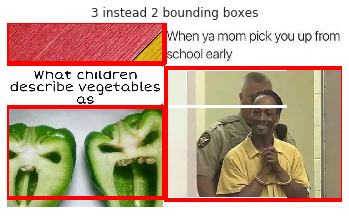

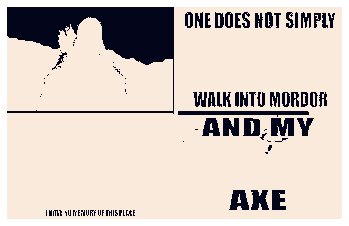

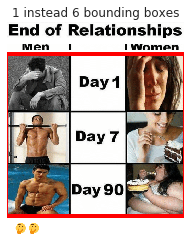

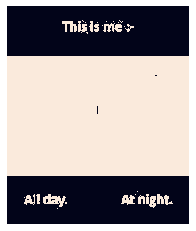

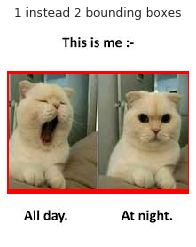

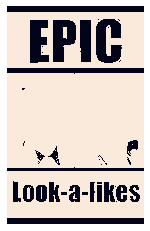

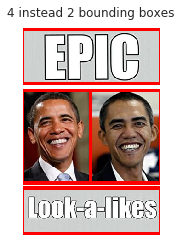

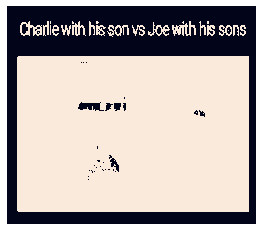

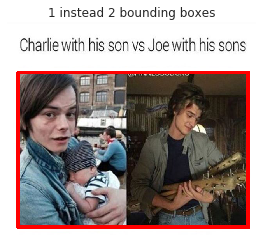

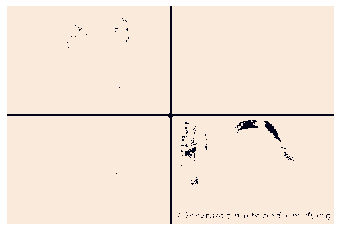

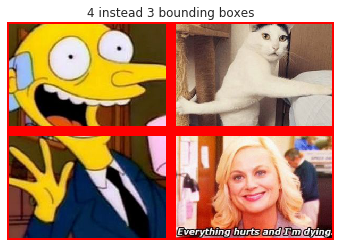

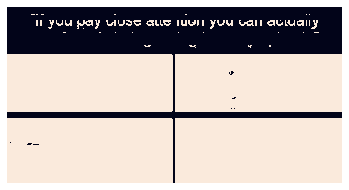

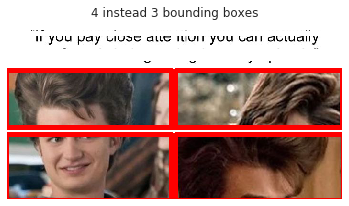

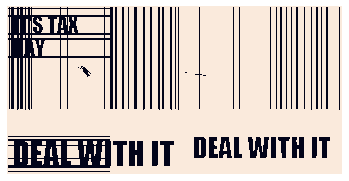

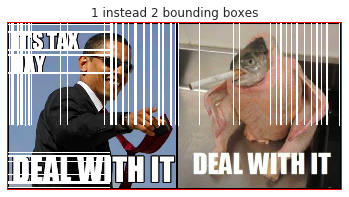

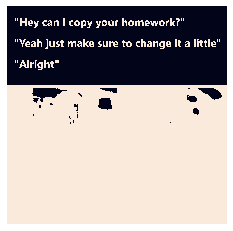

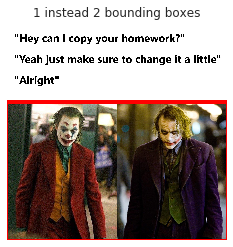

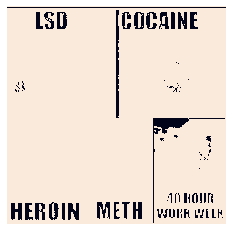

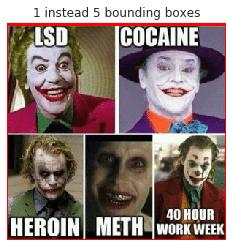

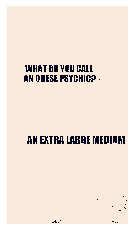

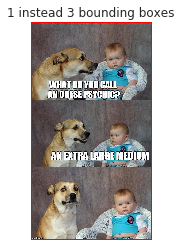

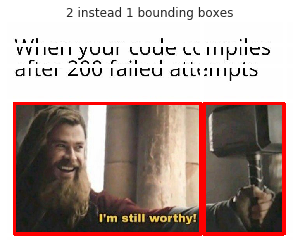

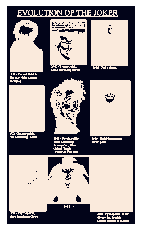

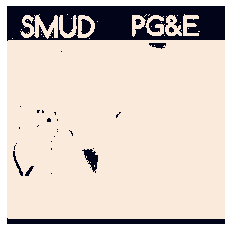

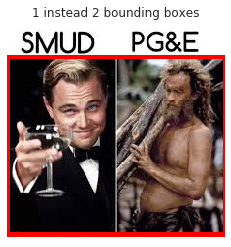

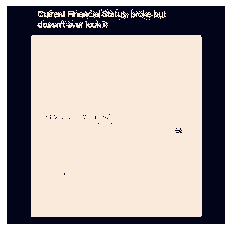

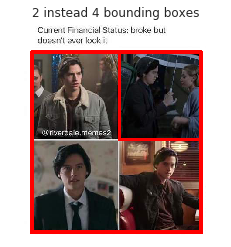

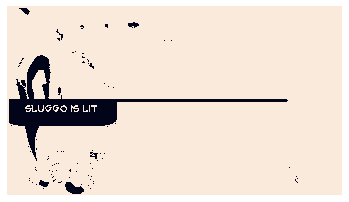

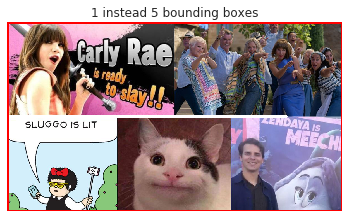

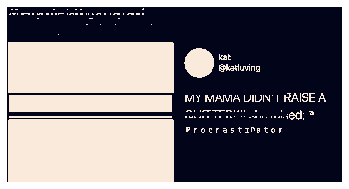

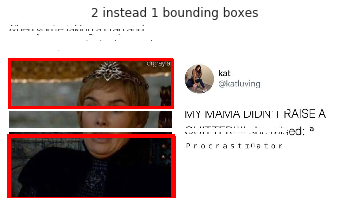

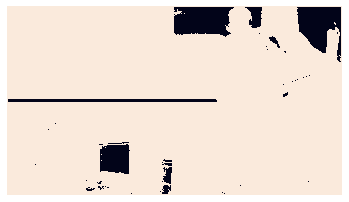

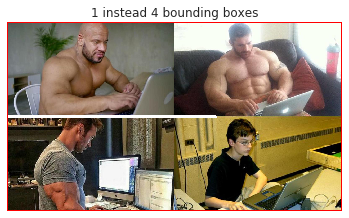

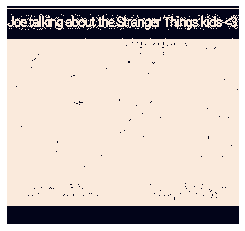

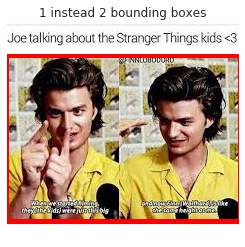

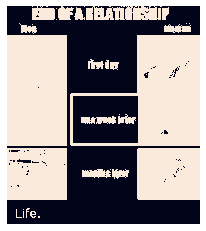

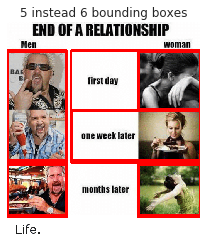

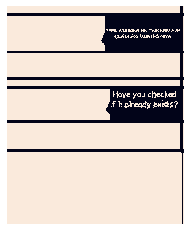

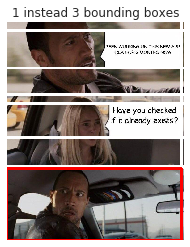

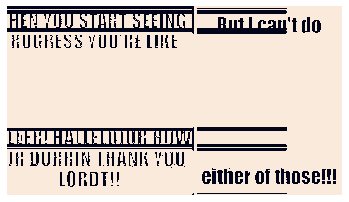

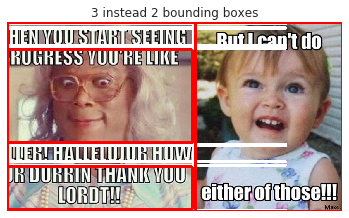

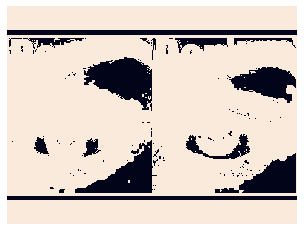

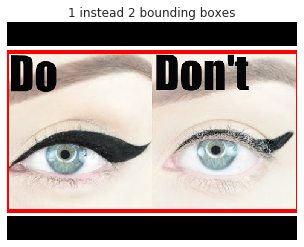

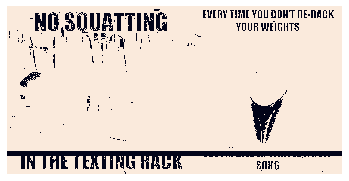

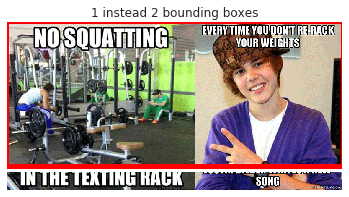

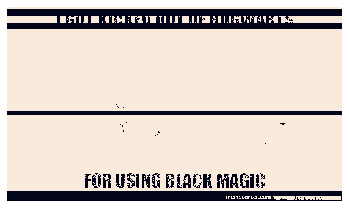

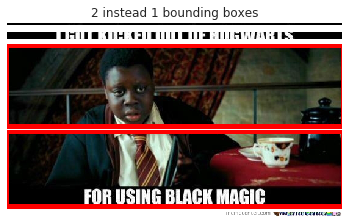

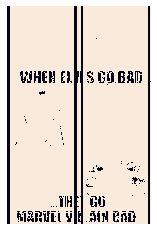

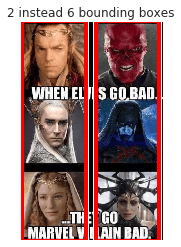

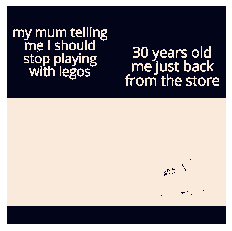

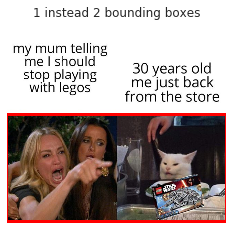

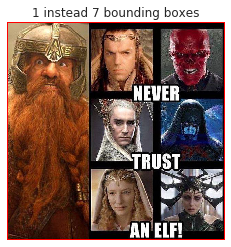

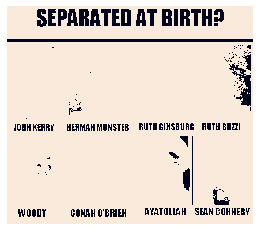

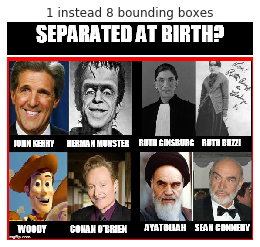

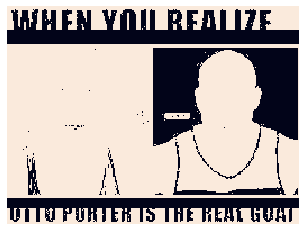

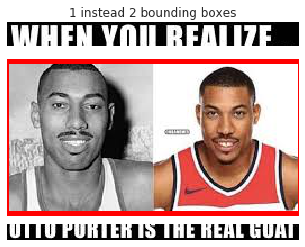

In [27]:
wrong_clfs = hough_tests_50(plot=True)

In [13]:
all = list(labels_count[:4]) + [sum(labels_count[4:])]
wrong = [wrong_clfs[1], wrong_clfs[2], wrong_clfs[3], wrong_clfs[4], np.sum(wrong_clfs[5:])]
good = [a - w for a, w in zip(all, wrong)]

In [14]:
good, wrong

([53.0, 47.0, 5.0, 5.0, 0.0], [3.0, 16.0, 5.0, 3.0, 8.0])

In [25]:
sns.set_palette('PiYG')

plt.figure(figsize=(8, 5))
labels_no, labels_count = np.unique(labels, return_counts=True)
labels_no = ['1', '2', '3', '4', '5 and more']
labels_count = list(labels_count[:4]) + [sum(labels_count[4:])]
plt.bar(np.array(range(5)) - 0.2, good, width=0.4, label='good', color='mediumaquamarine')
plt.bar(np.array(range(5)) + 0.2, wrong, width=0.4, label='wrong', color='hotpink')
plt.xlabel('number of pictures on single meme')
plt.ylabel('number of memes')
plt.xticks(range(5), labels_no)
plt.legend()
plt.show()

### Test on single image


Image shape: (834, 587)

Minimum no of points: 320
Normalized edges: 0.0673
Automatic value of min_lines: 394
Bounding boxes: 3
[[0, 573, 587, 234], [0, 276, 587, 286], [0, 1, 587, 264]]


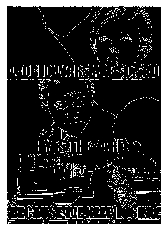

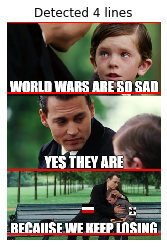

In [12]:
single_test('m7xtfyksb9u31_3', 320)